In [44]:
# From Chapter 1
import numpy as np
import sounddevice as sd
%matplotlib inline
import matplotlib.pyplot as plt


fs = 8000      # Sampling frequency CD rates at 44100 (44.1 kHz)
A_freq = 440   # This is a ISO standard

def create_sound(f, duration):    
    t = np.linspace(0, duration, fs * duration)
    
    note = np.cos(2 * np.pi * f * t)  # base note
    for i in range(2, 6):
        note += 0.3 / i * np.cos(i * 2 * np.pi * f * t)  #  sine(2*pi*f*t)
    return note

In [13]:
# From Chapter 2
freq_dict = {}
k = 2.0**(1.0/12.0)
fa = 440
f0 = fa / (k ** 9)

notes = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#",  "B", "C^"]

for i, note in enumerate(notes, start=0):
    freq_dict[note] = (k**i) * f0

In [18]:
# Little star
sheet = [("C", 1), ("C", 1), ("G", 1), ("G", 1), ("A", 1), ("A", 1), ("G", 1.5)]

music = []
for note, duration in sheet:
    music = np.concatenate((music, create_sound(freq_dict[note], duration)))
    
sd.play(music, fs)
    

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


In [ ]:
# Write your song.
sheet = []



In [60]:
# Listen to some EEG signal, what does it sound like
import pickle

# open a file, where you stored the pickled data
eeg_file = open('./res/meditation_focus_data.pickle', 'rb')

# dump information to that file
eeg_data = pickle.load(eeg_file)

print(eeg_data)

       meditation       focus
0       10.545731 -137.030284
1       17.248472 -144.336700
2       14.917056 -142.617544
3       21.584829 -146.606763
4       -8.055051 -160.602570
5       29.057185 -160.804749
6        8.690834 -144.089381
7        0.562668 -149.200757
8        3.397624 -162.575086
9       13.690313 -152.749379
10       8.319855 -148.052216
11       0.245412 -142.708778
12      22.488276 -144.697507
13      18.558820 -141.709646
14       8.753459 -131.575584
15       8.840243 -113.532066
16      11.071523 -121.796926
17      14.645894 -115.557988
18       4.984856 -120.549838
19       8.467674 -114.478429
20      24.077733 -109.709104
21      12.132645 -100.377401
22      23.386637  -98.997116
23      -8.581161 -100.549380
24      20.301501 -113.839149
25      24.586995 -117.709160
26       4.143715 -127.444903
27       0.740687 -115.434647
28      17.417590 -105.703036
29       4.743894 -112.373034
...           ...         ...
54769    2.487183   29.267311
54770   -3

[ 0.09472764  0.15493541  0.13399333 ... -0.02956848 -0.03469406
 -0.09013889]


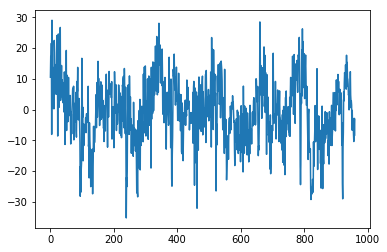

In [67]:
meditation = np.array(eeg_data["meditation"])


plt.plot(meditation[0:960])
meditation /= np.max(np.abs(meditation))
print(meditation)

sd.play(meditation, fs)



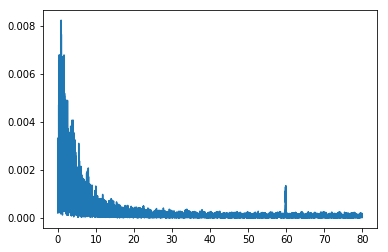

In [53]:
focus = np.array(eeg_data["focus"])

focus /= np.max(np.abs(focus))

sd.play(focus, fs)